## Сборный проект - 1. Анализ игрового интернет-магазина 

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# План работы

# 1   Откроем файл с данными и изучу общую информацию
  - импортируем все необходимые для работы библиотеки.
  - изучим данные методами info, head, tail, describe пострим гистограммы для всех столбцов.
# 2 Сделаем предобработку данных 
  - Заменим названия столбцов (приведем к нижнему регистру); 
  - Обработаем пропуски при необходимости:
  - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишем причины, которые могли привести к пропускам;
  - Преобразуйем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
  - Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;
 - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
# 3 Проведем  исследовательский анализ данных
  - Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
  - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
  - Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
  - Не будем учитывать  в работе данные за предыдущие годы.
  - Какие платформы лидируют по продажам, растут или падают? Выберем  несколько потенциально прибыльных платформ.
  - Построем  график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
  - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем  корреляцию между отзывами и продажами. Сформулируем  выводы.
  - Соотнесем выводы с продажами игр на других платформах.
  - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
# 4 Составим портрет пользователя каждого региона
 Определите для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясните разницу.
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе
# 5 проверим гипотезы 
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  - Зададим самостоятельно пороговое значение  для alpha.
# 6 Напишем общий вывод

##  Откроем файл с данными и изучу общую информацию 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


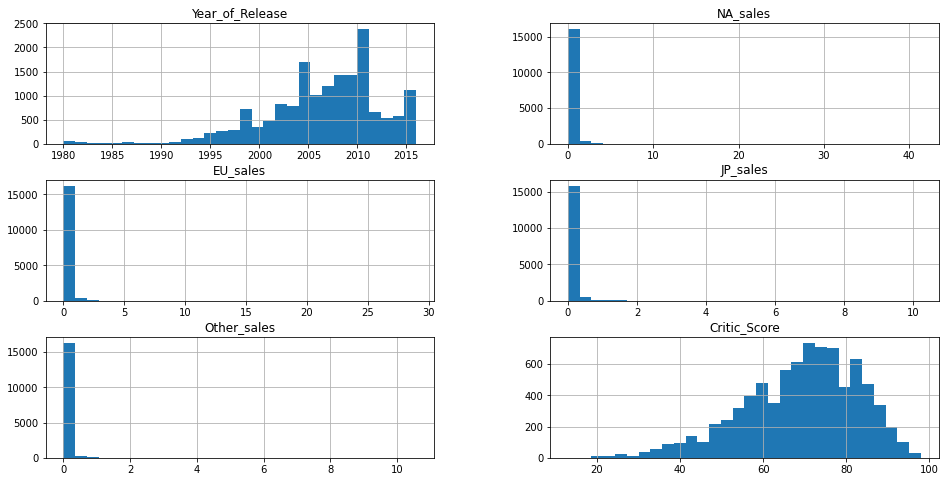

In [4]:
data.hist(bins = 30, figsize= (16, 8));

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выводы:
 - в данных есть огромное количество пропусков в столбцах с оценками и рейтингом. На этапе предобработки мы более детально ознакомимся с каждым столбцом и примем решение относительно способа их заполнения.
 - так же 2 пропуска в столбцах Name и Genre. Скорее всего, это пропуски в одинаковых строках. Их нужно удалить.
 - необходимо привести Year_of_Release в формат datetime,  User_Score и Rating в  float, а оценки критиков(critic_score) в int .
 - в числовых данных огромное кол-во нулей, которые сильно смещают среднее и медиану влево. Необходимо понять их природу и устратить оптимальным способом.

## Сделаем предобработку данных

### Заменим названия столбцов (приведем к нижнему регистру);

In [6]:
data.columns =  data.columns.str.lower()

list(data)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### удалим дубликаты, если они имеются


In [7]:
data[data.duplicated(['name', 'platform', 'year_of_release'])] 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [8]:
data =  data.drop_duplicates(['name', 'platform', 'year_of_release'])

In [9]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

In [10]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)].sum().sum()

0.0

Неявных дубликатов не обнаружено

### Обработаем пропуски 

Начнем с name и genre. Раньше выяснили, что у них у обоих по 2 пропуска, данные в этих столбцах относятся к категориальным переменнным, поэтому заполнить их мы никак не можем, а их количество сильно мало, чтобы сохранять эти данные.

In [12]:
data['name'].isnull().sum()

1

In [13]:
data = data.dropna(subset = ['name'])

проверим пропуски в genre

In [14]:
data['genre'].isnull().sum() 

0

Данные в genre удалились вместе с пропусками в name. Значит, это были пропуски в одинаковых строках\

Теперь приступим к year_of_release. Для начала, ознакомимся с этими строками

In [15]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Некоторые данные имеют год в названии. Однако, не всегда это фактический год выхода игры (например, игра FIFA Soccer в названии указывает следующий год от фактического  выпуска). Необходимо понять, какими еще способами мы можем запонить сроки.

In [16]:
data[data['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [17]:
data[data['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Видим, что одна и та же игра выпускалась на разных платформах, и где-то указан год релиза. По игре Space Invaders мы видим, что не везде этот год релиза одинаков, и не всегда мы сможем корректно поставить значения. Создадим функцию, которая находит другие упомимнания года и подставляет его в пропущенное значение, если он везде одинаков

In [18]:
# функция подстановки пропущенной даты выхода игры, по значению даты выхода на другой платформе.
# функция получает на вход: 
# games_wo_year - dataframe  с играми, в которых не заполнен год 
# sourse - исходный dataframe
def find_year_of_replase(games_wo_year, sourse):
    print("игры без года до обработки:",games_wo_year.shape[0])
    games_wo_date_of_realase = []
    games_wo_several_date_of_realase = []
    for i in games_wo_year.index:
        temp = (list(set(sourse.loc[sourse['name'] == sourse['name'][i], 'year_of_release'].dropna())))
        if len(temp) == 1:
            sourse['year_of_release'][i] = sourse.loc[sourse['name'] == sourse['name'][i], 'year_of_release'].max()
        elif len(temp) > 1:
            games_wo_several_date_of_realase.append(sourse['name'][i])
        else:
            games_wo_date_of_realase.append(sourse['name'][i])
            
    print("количество срок  без даты релиза:", len(games_wo_date_of_realase) )
    print("игры с несколькими датами релиза:", len(games_wo_several_date_of_realase) )
    print("количество игр без года после обработки",sourse['year_of_release'].isnull().sum() )

In [19]:
games_wo_year = data[data['year_of_release'].isnull() == True]
games_wo_year.shape

(269, 11)

In [20]:
find_year_of_replase(games_wo_year, data)

игры без года до обработки: 269
количество срок  без даты релиза: 146
игры с несколькими датами релиза: 12
количество игр без года после обработки 158


In [21]:
data.drop(data[data['year_of_release'].isna()].index, inplace =True)
data['year_of_release'].isna().sum()

0

Теперь, разберем отдельно значение tbd в столбце user_score: 

In [22]:
data['user_score'][data['user_score'] == 'tbd'].count()

2391

Обратимся к гуглу: tbd - это аббревиатура от словосочетания to be determined - "будет определено". Эта пометка говорит о том, что рейтинг только формируется, то есть, данных по нему нет. Заменим эти значения на пропуски:

In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Пробелы в данных critic_score и  user_score мы заполнять не будем по причине того, что эти данные являются субьективной оценкой и проставлять эти значения медианой мы не можем.

Теперь взглянем на rating. Посчитаем кол-во пропусков

In [24]:
data['rating'].isna().sum()

6695

Вновь обратимся к гуглу:  Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году

Значит, игры, чей выпуск до 1994 года, в принципе не могут иметь рейтинг от этой организации, тогда пропуски - это не ошибка в данных и их необходимо ставить без заполнения. 
Посмотрим, сколько останется игр после фильтрации по году:

In [25]:
rating =  data['rating'][data['year_of_release'] > 1994].isna().sum()
rating

6214

Все равно остается большое кол-во пустых значений. Однако, мы не будет их трогать, так как проставленные значения могут исказитьт дальнейший анализ

In [88]:
data['rating'] = data['rating'].fillna('Unknown')
data['rating'].value_counts()

Unknown    6695
E          3953
T          2929
M          1552
E10+       1411
EC            8
K-A           3
RP            2
AO            1
Name: rating, dtype: int64

### Преобразование данных

In [26]:
# функция принимает на вход название столбца и тип данных, в который ее нужно преобразовать,
# игнорируя пустые значения
# возвращает тип данных для проверки корректности работы функции 
def to_types(series, types, data): 
    data[series] = data[series].astype(types)
    return print(data[series].dtypes) 

In [27]:
to_types('year_of_release', 'int64', data)
to_types('critic_score', 'Int64', data)
to_types('user_score', 'float', data)

int64
Int64
float64


###  Посчет  суммарных продаж во всех регионах  в отдельный столбец.

In [28]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


Итоги:
- привели названия столбцов к единому регистру
- удалили дубликаты по основынм столбцам (name, platform, year_of_release,)
- восстановили часть данных в year_of_release, благодаря строкам - релизам на других платформах. То, что не восстановилось данным методом, было удалено. Данный столбец является ключевым в дальнейшем анализе и сроки с пропущенным значением в нем нам не нужны
- преобразовали столбцы к нужным типам данных
- оставили пропуски в critic_score, user_score, rating  не смотря на их большое количество - заполнение этих столбцов значениями могут исказить выборки.
- создали столбец world_sales, где посчитана сумма продаж по всем регионам

Причины пропусков в столбце rating:\
В данном столбце присваивается возрастной  рейтинг от негосударственной организации ESRB (англ. Entertainment Software Rating Board). Она была создана в 1994 и располагается в Канаде и Америке. Соответсвенно, игры, которые были выпущенны раньше 1994 и/или не в странах Северной Америки не имеют категорию данного рейтинга

##  Проведем исследовательский анализ данных

 - Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
  - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
  - Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
  - Не будем учитывать  в работе данные за предыдущие годы.
  - Какие платформы лидируют по продажам, растут или падают? Выберем  несколько потенциально прибыльных платформ.
  - Построем  график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
  - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем  корреляцию между отзывами и продажами. Сформулируем  выводы.
  - Соотнесем выводы с продажами игр на других платформах.
  - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

###  сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим гистограмму, которая наглядно покажет нам количество выпускаемых игр по годам:

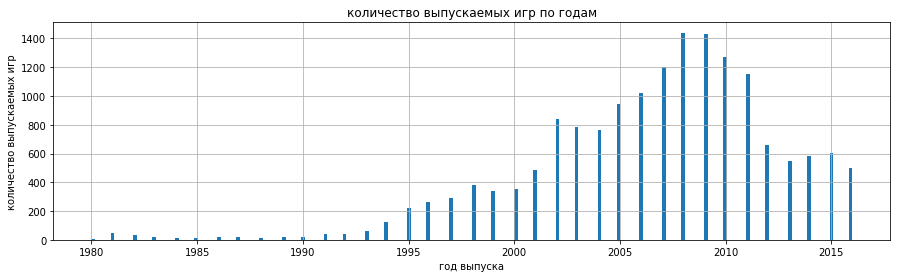

In [29]:
data['year_of_release'].hist( bins= 200, figsize= (15, 4))
plt.title('количество выпускаемых игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество выпускаемых игр');

  На графике видно, что постепенный рост в выпуске игр начинается примерно с 1993 года. Данные, раньше этого периода, мы можем не учитывать в дальнейшем анализе в связи с их малым количеством.\
  Самым продуктивным периодом можно считать с 2005 по 2011 года, после - количество игр резко снижается. Мы можем это обьяснить тем, что вектор игровых компаний сменился с количества на качество. Если это так, то на графике с оценками, в период с 2010 и выше мы увидим повышение средних оценок. Построим график:

In [30]:
data['year_of_release_increase'] = data['year_of_release'][data['year_of_release'] > 1992]

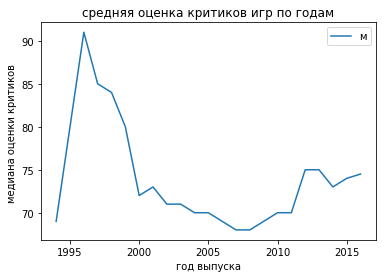

In [31]:
data_critic_score = (data.pivot_table(index = 'year_of_release_increase', values = 'critic_score', aggfunc = 'median')
                     .plot().legend('медиана'))
plt.title('средняя оценка критиков игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('медиана оценки критиков ');

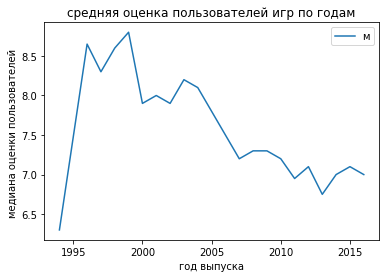

In [32]:
data_user_score = (data.pivot_table(index = 'year_of_release_increase', values = 'user_score', aggfunc = 'median')
                     .plot().legend('медиана'))
plt.title('средняя оценка пользователей игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('медиана оценки пользователей ');

Действительно, в период пиковой производительности(2005-2011) оценка критиков и пользователей сильно уменьшилась. И начала подниматься с 2012 когда кол-во игр упало. Но, важно сделать ремарку - данные выводы сделаны на основе имеющихся данных (около половины заполненных значений от общей таблицы). В реальности, картина может отличатся, но тенденция будет иметь примерно одинаковый вид. 
Исходя из вышепечисленного, при построении пронозов на 2017 год, необходимо опираться на данные, начиная с 2012

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

Для начала, рассмотрим сколько копий игр  за все время выпустила каждая платформа :

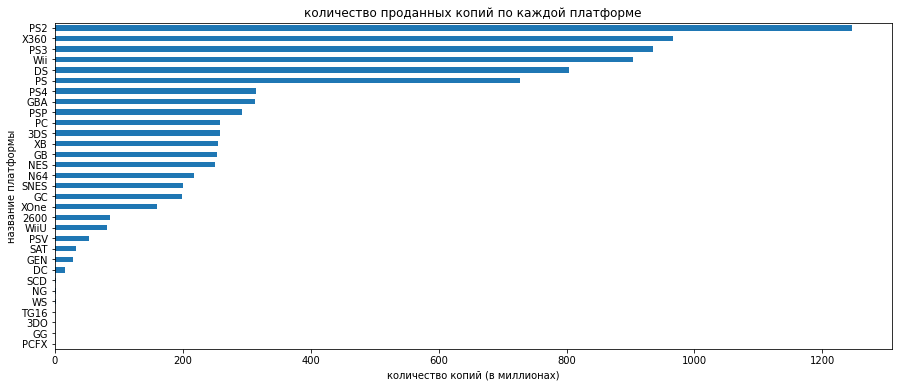

In [33]:
data_platform_sales = (data.groupby('platform')['world_sales'].sum()
                       .sort_values(ascending = True)
                      )
                       
data_platform_sales.plot(kind = 'barh', figsize = (15,6))                      
plt.title('количество проданных копий по каждой платформе')
plt.xlabel('количество копий (в миллионах)')
plt.ylabel('название платформы');

Нам необходимо построить график по годам и платформам с наибольшими продажами, а так же отследить характерный срок, за который появляются и исчезают платформы. Возьмем первые 6 и создадим график, отображающий нужные значения:

In [34]:
                                                                                                
data_platform_sales_index = list(data_platform_sales.tail(6).index)
data_platform_sales_index

['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

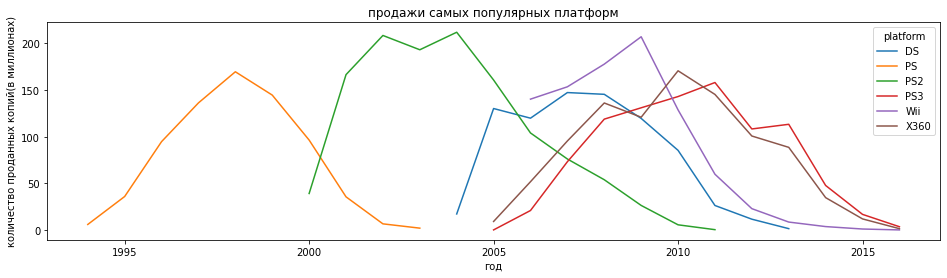

In [35]:
data_popular_platform = (data.query('platform in @data_platform_sales_index')
                         .pivot_table( index = 'year_of_release_increase',
                                      columns = 'platform',
                                      values = 'world_sales',
                                      aggfunc ='sum')
                         .plot( figsize = (16, 4))
                        )
plt.title('продажи самых популярных платформ')
plt.xlabel('год')
plt.ylabel('количество проданных копий(в миллионах)');

В среднем, срок жизни платформ (если судить по самым популярным из списка) примерно 8-10 лет. Пик созданий примерно 2005 год - тогда как раз и начинался огромный рост количества игр. 
Видим, что количество копий в тех платформах, на которые все еще выпускаются игры, стремительно падает. Можно предположить, что скорее всего, сейчас набирают свою популярность что-то другое. Значит, при планировании на 2017 год необходимо обращать внимание не на самые популярные платформы за все время, а в период после 2010 года

### Возьмем данные за соответствующий актуальный период. Актуальный период определили самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Ранее уже было сказано, что актуальный период для прогноза на 2017 год - это данные с 2012 года, так как в это время меняется тактика при создании игр. Создадим новый датасет, по которому будет происходить дальнейший анализ 

In [36]:
data_actual = data[data['year_of_release'] >= 2012]
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales,year_of_release_increase
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,2013.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,2013.0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63,2015.0
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60,2013.0
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,2012.0


### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ

Проделаем все то же самое, что и в предыдущем пункте. Сначала посмотрим общую картину по продажам на платформах:

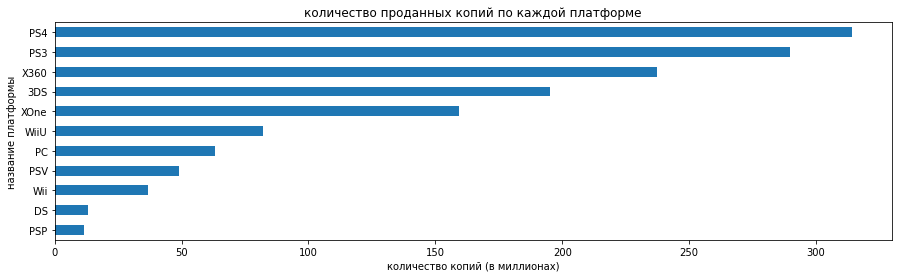

In [37]:
data_platform_sales_actual = (data_actual.groupby('platform')['world_sales'].sum()
                       .sort_values(ascending = True)
                      )
                       
data_platform_sales_actual.plot(kind = 'barh', figsize = (15,4))                      
plt.title('количество проданных копий по каждой платформе')
plt.xlabel('количество копий (в миллионах)')
plt.ylabel('название платформы');

По графику можно увидеть 5 самых популярных платформ:
   - PS4
   - PS3
   - X360
   - 3DS
   - XOne
   
Теперь, посмотрм на динамику продаж. Может оказаться, что  самые популярные платформы уже становятся менее актуальны:

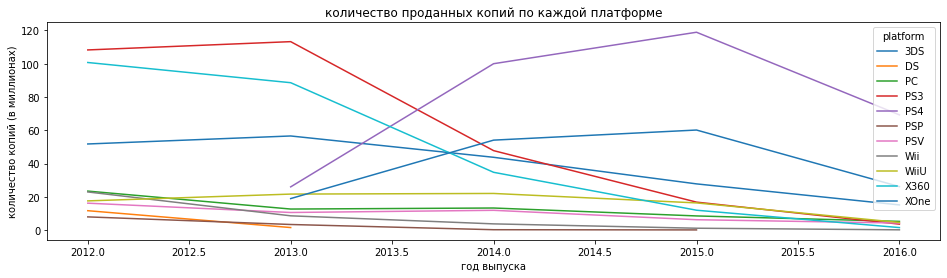

In [38]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'platform',
                                                            values = 'world_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 4))
                                   )
plt.title('количество проданных копий по каждой платформе')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Очень много линий, создающий шум и мешающий анализу. Но мы увидели основное: новых платформ, которые только набирают популярность нет. А это значит, что мы можем спокойно взять топ 5 и анализировать его: 

In [39]:
data_platform_sales_actual_index = list(data_platform_sales_actual.tail(5).index)
data_platform_sales_actual_index

['XOne', '3DS', 'X360', 'PS3', 'PS4']

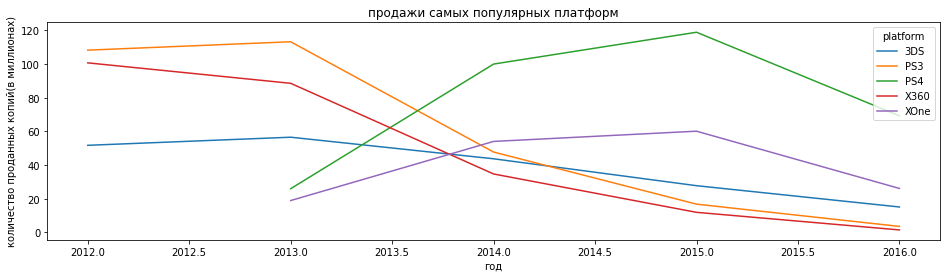

In [40]:
data_actual_popular_platform = (data_actual.query('platform in @data_platform_sales_actual_index')
                         .pivot_table( index = 'year_of_release_increase',
                                      columns = 'platform',
                                      values = 'world_sales',
                                      aggfunc ='sum')
                         .plot( figsize = (16, 4))
                        )
plt.title('продажи самых популярных платформ')
plt.xlabel('год')
plt.ylabel('количество проданных копий(в миллионах)');

Итак, потенциально прибыльными платформами можно считать:
  - PS4
  - XOne
  
Платформы, которые теряют свою популярность:
 
  - PS3
  - X360
  - 3DS

Необходимо уточнить один момент: на графике видно, что количество проданных копий снижается на всех платформах, но это не значит, что они все теряют популярность. Снижение может быть связано с "затишьем" в релизах. Выпущенные игры большинство пользователей могли уже купить, а для создания новых необходимо какое-то количество времени. В любом случае, данные платформы являются относительно новыми (4 года), а, это означит, что разработчики продолжат выпускать эксклюзивные релизы именно на них.

### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

создаем лист, на основе сводной таблицы, гдке перечислены все платформы 

In [41]:
data_actual_name = (list(data_actual.pivot_table(index= 'platform',
                                            values = 'world_sales',
                                            aggfunc = 'sum').index)
                   )
data_actual_name

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

пишем функцию, которая строит диаграммы размаха(ящик с усами) для каждой платформы

In [42]:
# Функция принимает на вход:
# name - лист с названиями платформ
# data - DataFreme 
# функция дает на выход:
# диаграмму размаха по глобальным продажам на каждой платформе 

def data_actual_name_plotbox(name, data) :
    for i in name:
        fig, ax = plt.subplots(figsize = (17,2))
        ax = data['world_sales'][data['platform']== i].plot.box(vert = False, ax =ax)
        ax.set_title(f'Диаграмма размаха продаж по {i}');
        

        
    

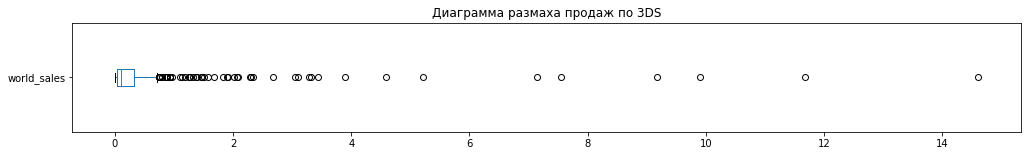

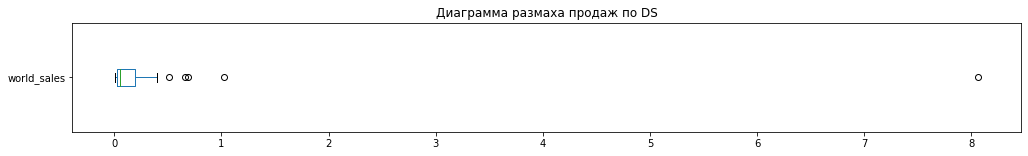

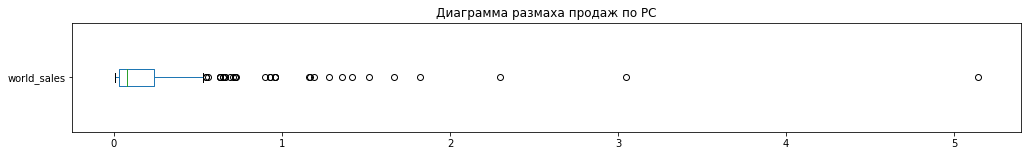

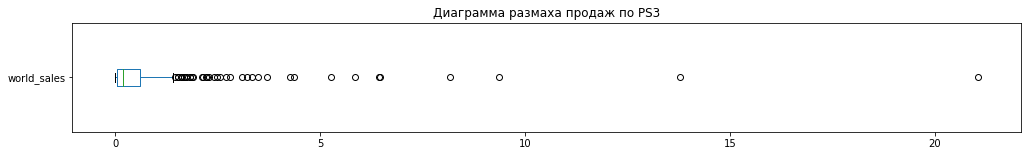

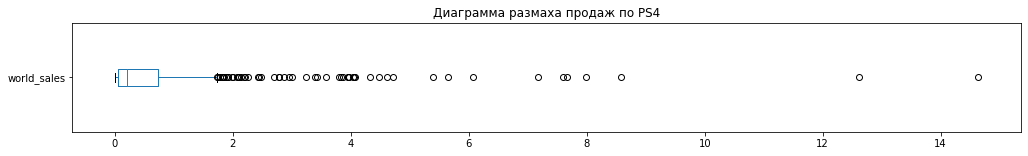

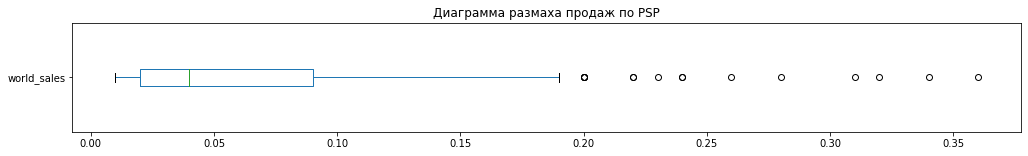

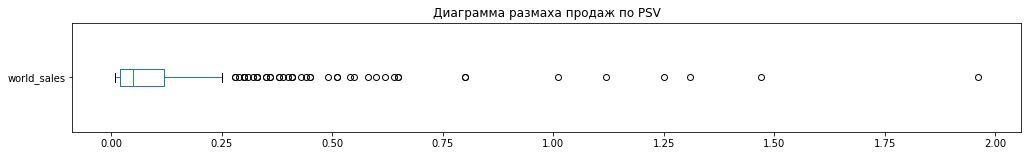

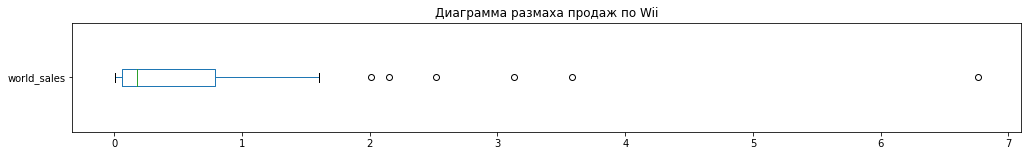

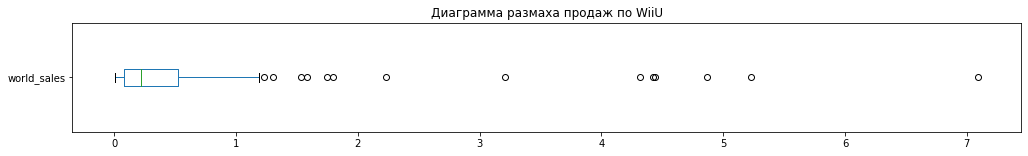

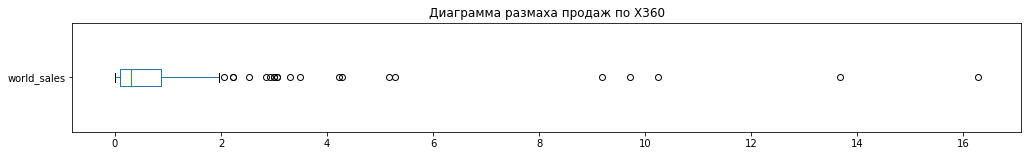

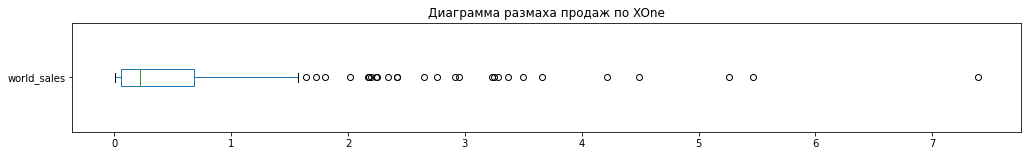

In [43]:
data_actual_name_plotbox(data_actual_name, data_actual)

В данных очень большое кол-во выбросов, которое мешает нам сравнить диаграммы между собой. Ниже я напишу точно такую же функцию, но уже с необходимым для меня интервалом ( от 0 до 3)

In [44]:
# Функция принимает на вход:
# name - лист с названиями платформ
# data - DataFreme 
# функция дает на выход:
# диаграмму размаха по глобальным продажам на каждой платформе 

def data_actual_name_plotbox_range(name, data) :
    for i in name:
        fig, ax = plt.subplots(figsize = (17,2))
        ax = data['world_sales'][data['platform']== i].plot.box(vert = False, ax =ax)
        ax.set_title(f'Диаграмма размаха продаж по {i}')
        ax.set_xlim(0, 3);

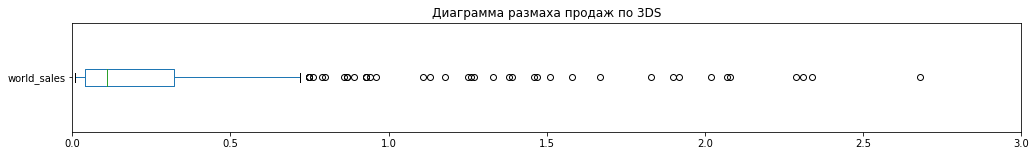

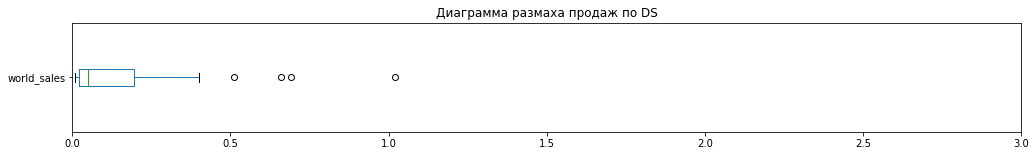

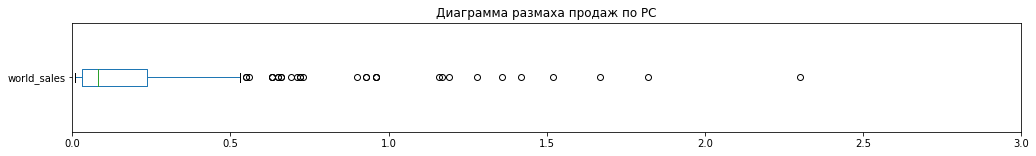

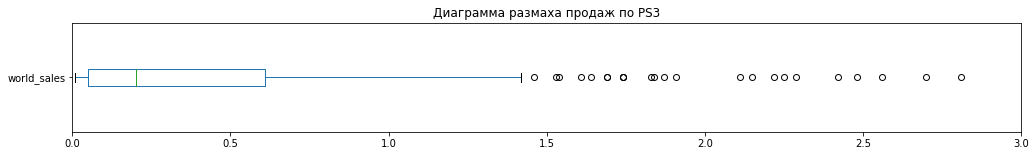

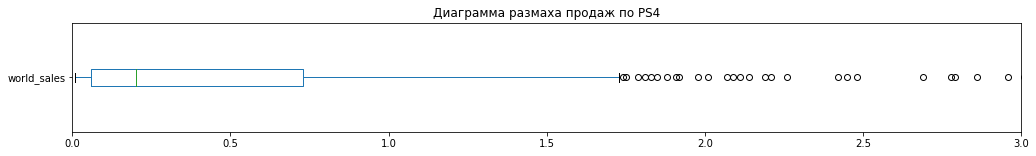

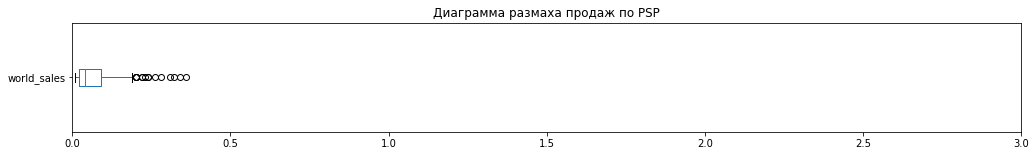

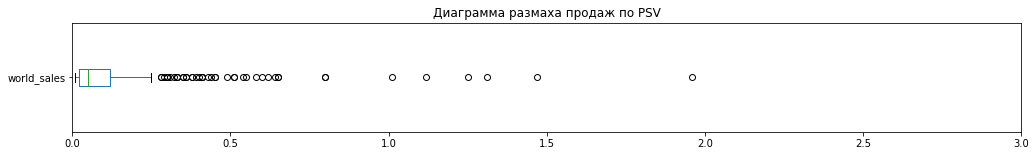

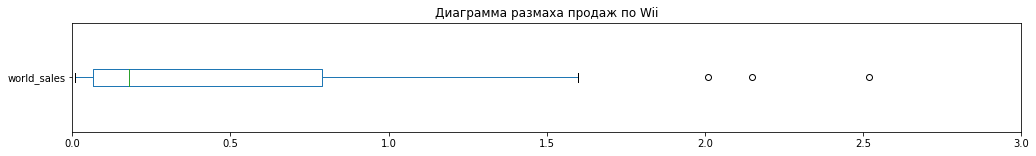

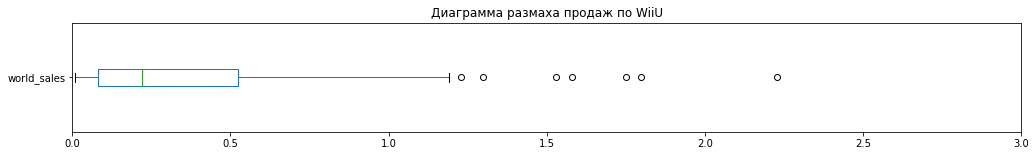

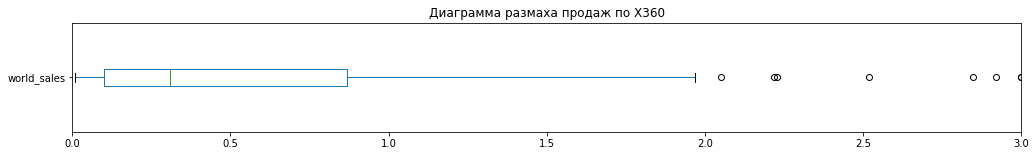

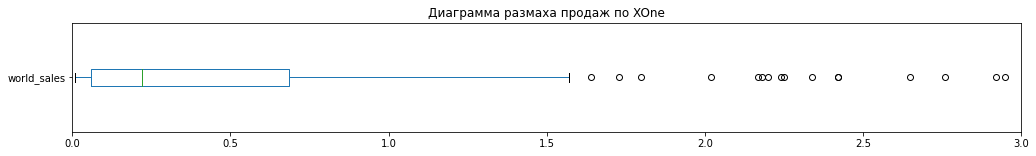

In [45]:
data_actual_name_plotbox_range(data_actual_name, data_actual)

Отлично, теперь можно более подробно описать то, что мы видим:
 - выше остальных медианы продаж у  xbox(X360, XOne), и sony (PS3, PS4). ранее, мы уже отмечали что данные платформы являются лидирующими по продажам, сменяя друг друга более новым поколением себя
 - игры на компьютере PC имеют более низкую стоимость, чем на консоли
 - в данных много выбросов - Значит, у каждой консоли были игры, которые нравились широкой аудитории
 - ниже остальных медиану продаж  имеют: PSP, PSV, DC

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы

в качестве платформы выберем PS4 -самую популярную по количеству продаваемых копий в выбранный нами актуальный промежуток

In [46]:
data_actual_PS4 = data_actual.query('platform == "PS4"')

Построим 2 диаграммы рассенияния: зависимость продаж от оценки критиков и зависимость продаж от оценки пользователй. Так же, посчитаем коореляцию между этими данными в каждой диаграмме

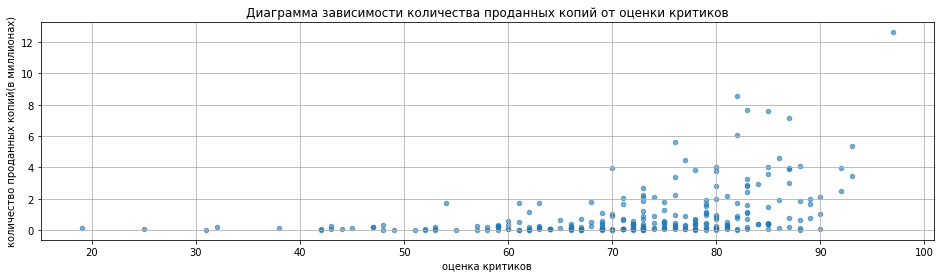

In [47]:
data_actual_PS4.plot(y = 'world_sales',
                     x = 'critic_score',
                     kind = 'scatter',
                     title = 'Диаграмма зависимости количества проданных копий от оценки критиков',
                     alpha = 0.6 ,
                     grid = True, 
                     figsize = (16, 4),
                     )
plt.xlabel('оценка критиков')
plt.ylabel('количество проданных копий(в миллионах)');
                

In [48]:
n = data_actual_PS4['critic_score'].astype('float64').corr(data_actual_PS4['world_sales'])
f'корреляция между оценкой критиков и количеством проданных копий составляет {n:.2%}'

'корреляция между оценкой критиков и количеством проданных копий составляет 40.66%'

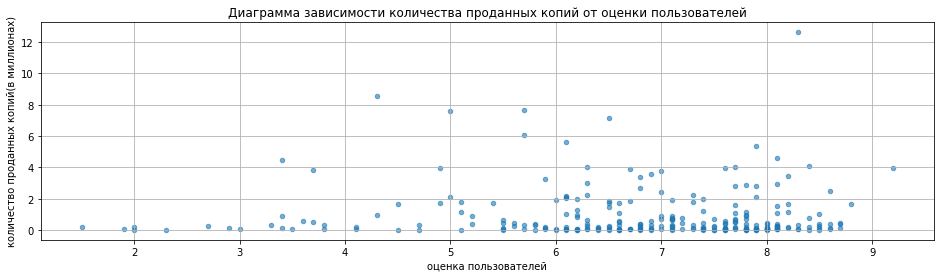

In [49]:
data_actual_PS4.plot(y = 'world_sales',
                     x = 'user_score',
                     kind = 'scatter',
                     title = 'Диаграмма зависимости количества проданных копий от оценки пользователей',
                     alpha = 0.6 ,
                     grid = True, 
                     figsize = (16, 4)
                     )
plt.xlabel('оценка пользователей')
plt.ylabel('количество проданных копий(в миллионах)');

In [50]:
n = data_actual_PS4['user_score'].astype('float64').corr(data_actual_PS4['world_sales'])
f'корреляция между оценкой пользователей и количеством проданных копий составляет {n:.2%}'

'корреляция между оценкой пользователей и количеством проданных копий составляет -3.20%'

К сожалению, данных по оценкам недостаточно для постоения информативной диаграммы, но по подсчету корреляции мы можем сделать выводы:
 - корреляция между оценкoй критиков и количеством проданных копий средняя - то есть, зависимость между показателями есть, но это не значит, что одно сильно влияет на другое. Возможно, существуют еще факторы, которые способствуют высоким продажам 
 - оценка пользователей не имеет влияние на продажи, в конкретном случаее корреляция еще и  незначительно ушла в минус - обратную зависимость
 
Проверим корректность данных выводах на других платформах:

Для проверки выводов на других платформах создадим функцию, которая на вход примет название платформы, а на выход получим корреляцию и диаграммы рассеяния для этой платформы:

In [51]:
# Функция для построения диаграммы зависимости и 
# подсачета корреляции для оценки критиков 

def scores_critic (plat, data):
    data_platform = data.query('platform == @plat')
    data_platform.plot(y = 'world_sales',
                     x = 'critic_score',
                     kind = 'scatter',
                     title = 'Диаграмма зависимости количества проданных копий от оценки критиков',
                     alpha = 0.6 ,
                     grid = True, 
                     figsize = (16, 4),
                     )
    plt.xlabel('оценка критиков')
    plt.ylabel('количество проданных копий(в миллионах)');
    
    n = data_platform['critic_score'].astype('float64').corr(data_platform['world_sales'])
    
    return f'корреляция между оценкой критиков и количеством проданных копий составляет {n:.2%}'
    
    

In [52]:
# Функция для построения диаграммы зависимости и 
# подсачета корреляции для оценки пользователей 

def scores_user (plat, data):
    data_platform = data.query('platform == @plat')
    data_platform.plot(y = 'world_sales',
                     x = 'user_score',
                     kind = 'scatter',
                     title = 'Диаграмма зависимости количества проданных копий от оценки пользователей',
                     alpha = 0.6 ,
                     grid = True, 
                     figsize = (16, 4)
                     )
    plt.xlabel('оценка пользователей')
    plt.ylabel('количество проданных копий(в миллионах)');
    
    m = data_platform['user_score'].astype('float64').corr(data_platform['world_sales'])
    
    return f'корреляция между оценкой пользователей и количеством проданных копий составляет {m:.2%}'


Теперь построим для 5 других популярных платформ диаграммы и посчитаем корреляции:

PS3:

'корреляция между оценкой критиков и количеством проданных копий составляет 33.40%'

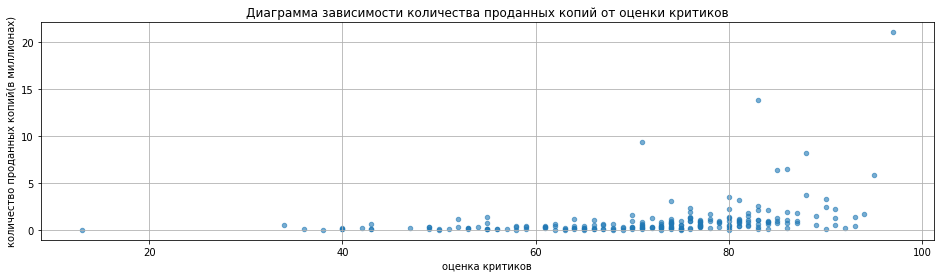

In [53]:
scores_critic('PS3', data_actual)

'корреляция между оценкой пользователей и количеством проданных копий составляет -0.61%'

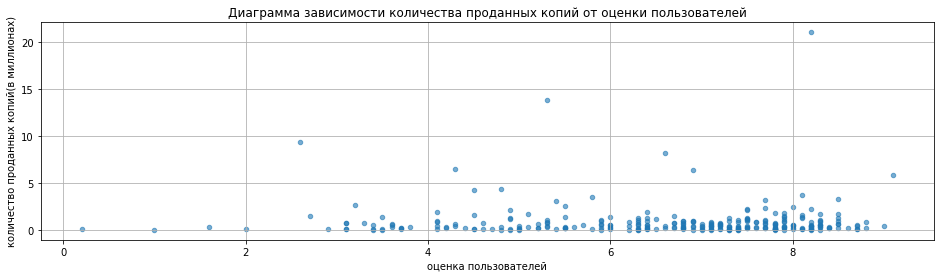

In [54]:
scores_user('PS3', data_actual)

X360:

'корреляция между оценкой критиков и количеством проданных копий составляет 36.03%'

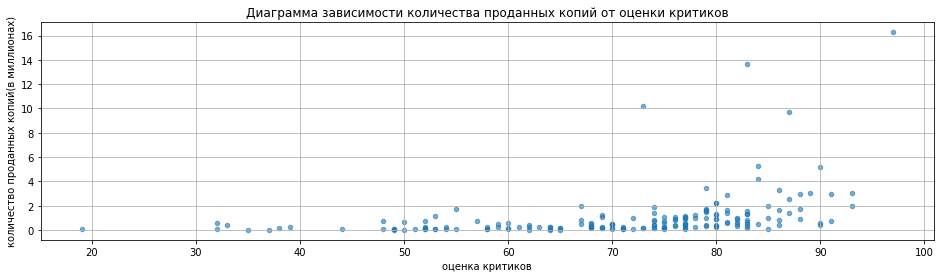

In [55]:
scores_critic('X360', data_actual)

'корреляция между оценкой пользователей и количеством проданных копий составляет 0.63%'

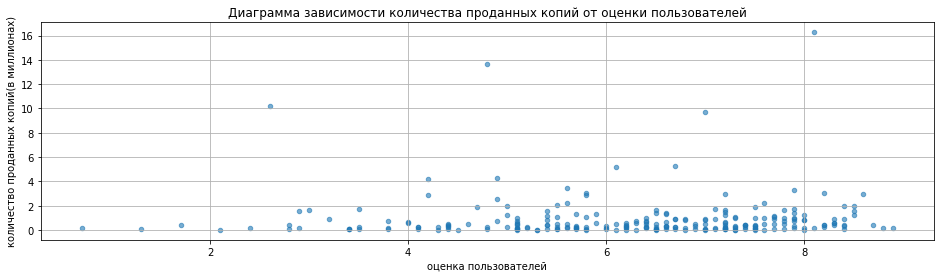

In [56]:
scores_user('X360', data_actual)

3DS:

'корреляция между оценкой критиков и количеством проданных копий составляет 32.05%'

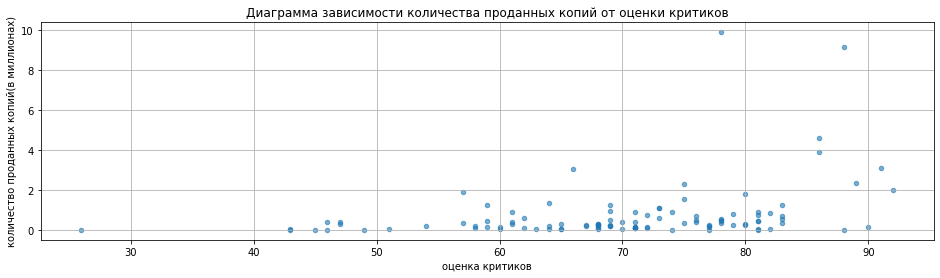

In [57]:
scores_critic('3DS', data_actual)

'корреляция между оценкой пользователей и количеством проданных копий составляет 19.81%'

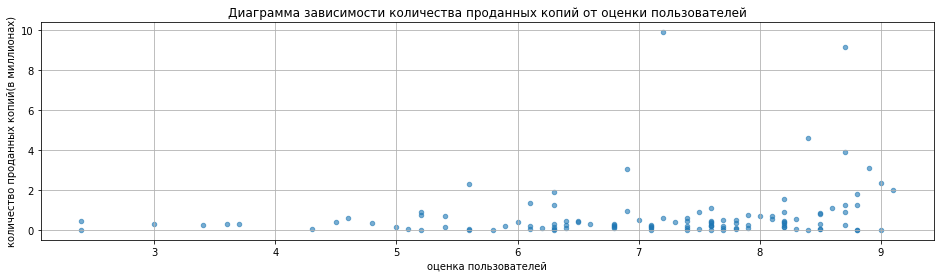

In [58]:
scores_user('3DS', data_actual)

XOne:

'корреляция между оценкой критиков и количеством проданных копий составляет 41.70%'

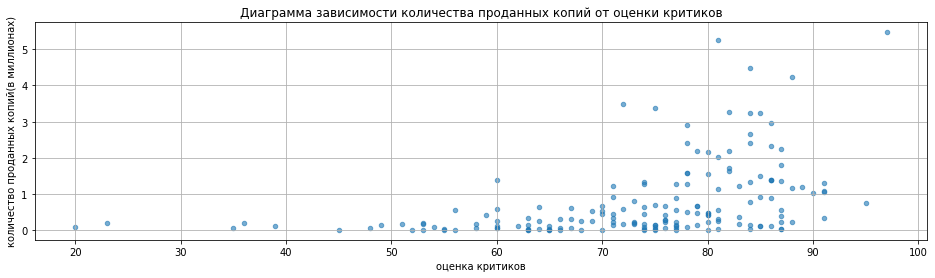

In [59]:
scores_critic('XOne', data_actual)

'корреляция между оценкой пользователей и количеством проданных копий составляет -6.89%'

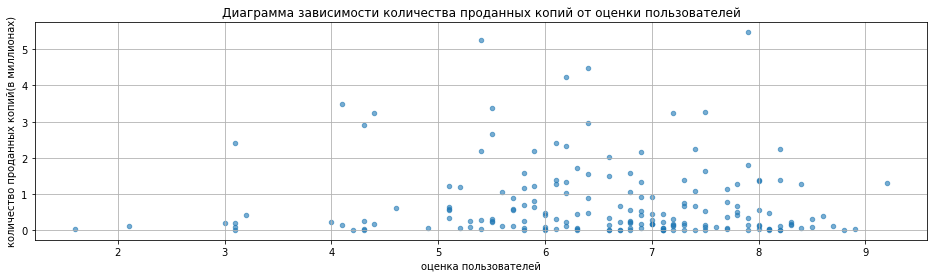

In [60]:
scores_user('XOne', data_actual)

PC (берем как альтернативу консолям):

'корреляция между оценкой критиков и количеством проданных копий составляет 24.06%'

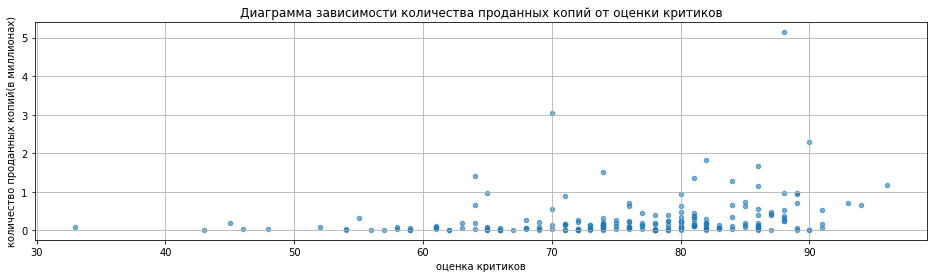

In [61]:
scores_critic('PC', data_actual)

'корреляция между оценкой пользователей и количеством проданных копий составляет -12.16%'

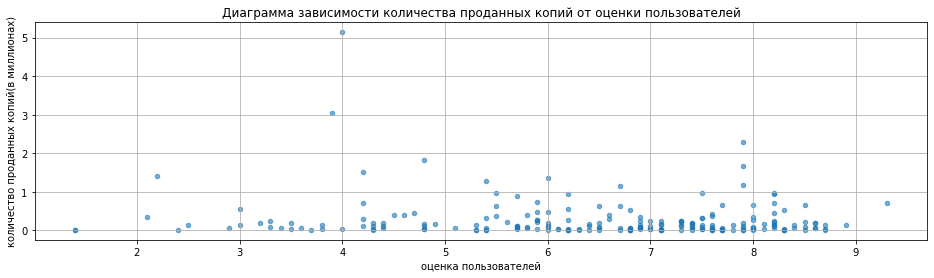

In [62]:
scores_user('PC', data_actual)

По результатам проверки корреляций по другим платформам можно сделать вывод:
   - оценка критиков, если и влияет на продажи, то очень незначительно. На некоторых платформах процент корреляции составлял даже ниже 20-30% (мы можем говорить о видимой взаимосвязи между показателями при корреляции в 50% и выше)
   - оценка пользователей практически везде не влияет на продажи (практически, потому что для платформы 3DS видна зависимость в сравнении с другими платформами. Однако, процент все равно достаточно мал, чтобы говорить о точно взаимосвязи между данными)

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Изучим сколько суммарно было продано копий по каждому жанру:

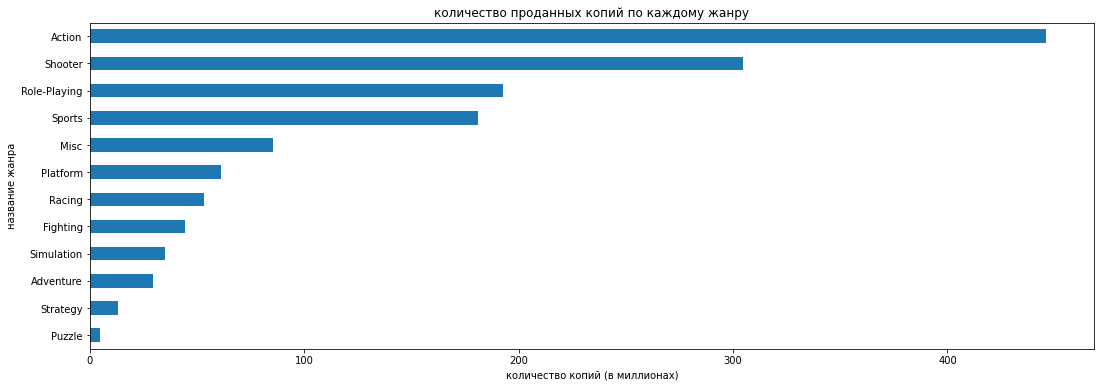

In [63]:
(
    data_actual.groupby('genre')['world_sales'].sum().sort_values(ascending = True)
    .plot(kind = 'barh', figsize = (18,6)) 

)
                      
plt.title('количество проданных копий по каждому жанру')
plt.xlabel('количество копий (в миллионах)')
plt.ylabel('название жанра');

Теперь, как менялись продажи в каждом году:

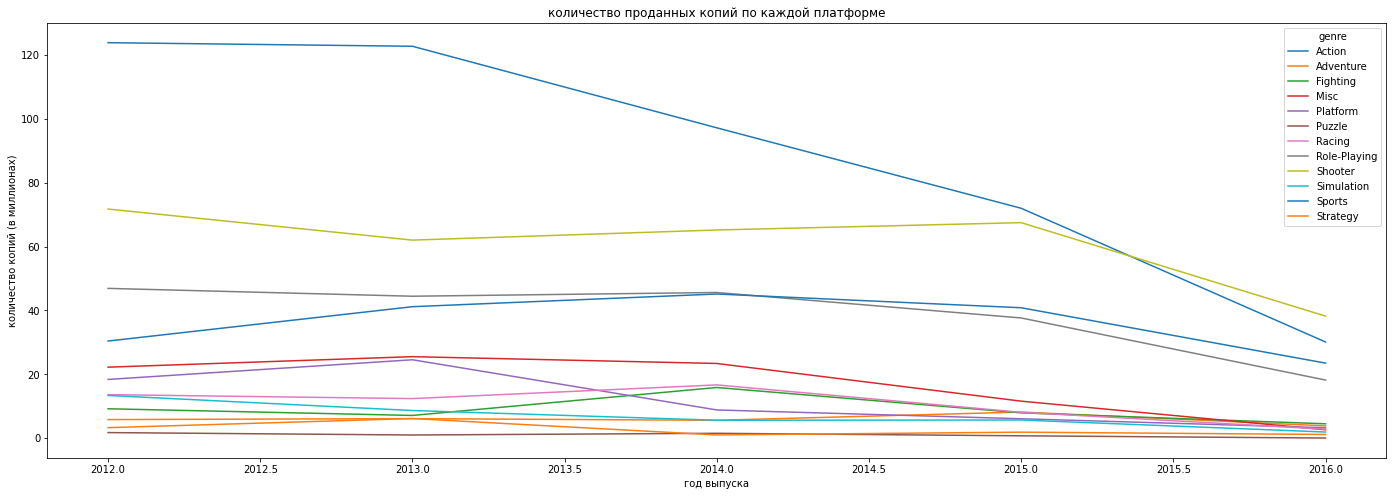

In [64]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'genre',
                                                            values = 'world_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (24, 8))
                                   )
plt.title('количество проданных копий по каждой платформе')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Самым продаваемым жанром является экшен, следом идут шутеры, рпг (role-playing) и спортивный жанр. Видим, что продажи экшена с 2013 года начали постепенно падать, а популярность шутеров по- немногу возрастать.\
Самыми непопулярными жанрами у пользователй можно назвать стратегии и пазлы

Рассмотрим медианы продаж по каждому жанру. Нам необходимо найти те, которые стабильно приносят хорошие продажи.
Для этого, посмтроим диаграммы размаха для проданных игр по жанру. Сами данные будут рассматриваться в логарифмической шкале для более наглядной визуализации

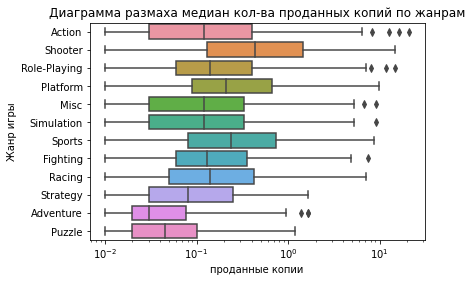

In [65]:
sns.boxplot(y='genre', x='world_sales',data = data_actual, whis=20)

plt.xscale('log')
plt.ylabel('Жанр игры')
plt.xlabel('проданные копии')
plt.title('Диаграмма размаха медиан кол-ва проданных копий по жанрам');

Теперь выведем на экран количество игр по каждому жанру

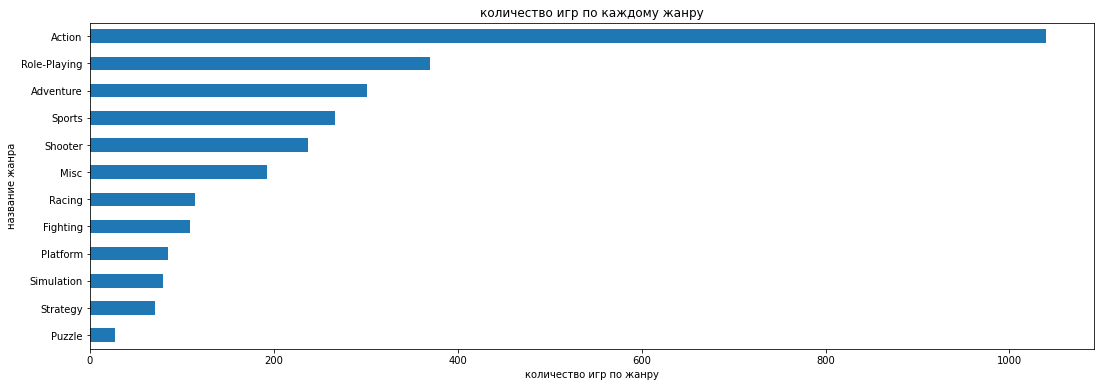

In [66]:
data_actual.groupby('genre')['name'].count().sort_values(ascending = True).plot(kind = 'barh', figsize = (18,6)) 

plt.title('количество игр по каждому жанру')
plt.xlabel('количество игр по жанру')
plt.ylabel('название жанра');

Вывод:
Самыми популярными по продажам можно выделить в порядке убывания жанры: 
- action 
- shooter 
- role-playing 
- sports

Однако, если говорить о жанрах, которые стабильно показывают высокий доход, то рейтинг заментно меняется:
 - shooter
 - platform
 - sports
 - racing
 
Отвечая на вопрос "Выделяются ли жанры с высокими и низкими продажами?":
Да, действительно выделяются жанры с более высокими и более низкими продажами. Однако, необходимо рассматривать не общие продажи, а их медианы. Так как кол-во игр может быть небольшим, но каждая из них имела высокий спрос у пользователей. К таким можно отнести жанры platform и racing. Количество игр небольшое, но их медианы оказались выше чем у самого популярного action 

### Итоги исследовательского анализа:
- игры массово стали производить с 1993. Пик количества производительности игр в год можно считать период с 2005 по 2011
- после 2012 года компании взяли вектор на более тщательную проработку каждой игры. Об этом говорит резкий упадок по количеству игр в эти периоды, и увеличение средней оценки критиков
- средняя продолжительность жизни одной платформы 8-10 лет. Самыми популярными за весь временной промежуток можно считать платформу ps2, средом по популярности идут x360, ps3 и wii. Однако, на конец 2016 года их популярность стала падать, а на замену пришли новые поколения платформ
- новое поколение популярных платформ: PS4 и XOne. Они были созданы в 2013 и являются потенциально самыми  прибыльными из числа других
- для дальнейшего анализа и прогнозов был выбран временной промежуток с 2012 года. Именно тогда компанни перестали массово выпускать игры и сменили вектор на более качественный продукт.
- игры, выпускаемые на компьютеры имеет более низкую стоимость чем такие же игры, которые выпускаются на консоли (об этом гововят медианы продаж по каждой платформе)
- корреляция между оценкой критиков  и количеством проданных копий  небольшая  - то есть, зависимость между показателями есть, но одно не критично  влияет на другое (процент корреляции примерно 20 - 40%). Оценка пользователей, наоборот, не имеет влияния на общие продажи игры.
- Самые популярные жанры по количеству игр - action и shooter. Самые прибыльные - shooter, sports и  platform


## Составим портрет пользователя каждого региона
 Определите для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясните разницу.
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе


Для этого задания сначала составим портрет каждого региона по 3-м пунткам, а в самом конце сравним их между собой и сделаем выводы

### пользователи в регионе NA

Создадим срез, где будут только пользователи необходимрго региона:

#### Самые популярные платформы (топ-5):

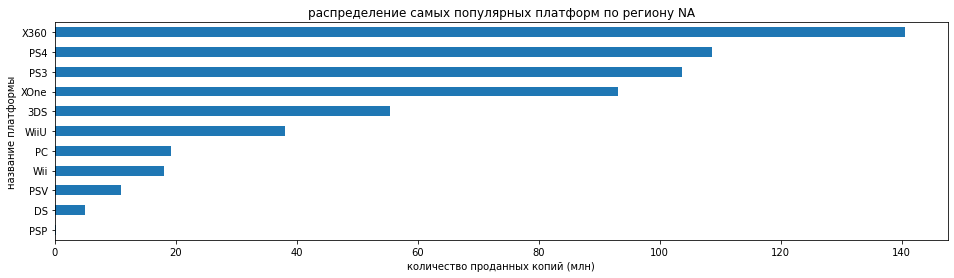

In [67]:
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (16, 4)) 

plt.title('распределение самых популярных платформ по региону NA')
plt.xlabel('количество проданных копий (млн)')
plt.ylabel('название платформы');

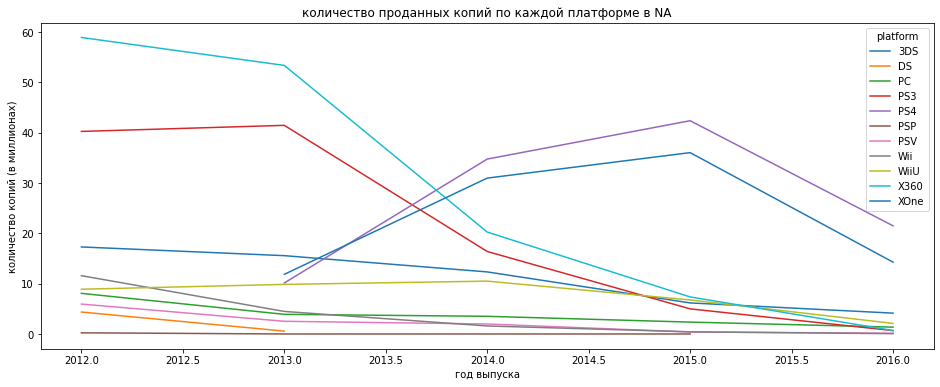

In [68]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'platform',
                                                            values = 'na_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 6))
                                   )
plt.title('количество проданных копий по каждой платформе в NA')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Популярные платформы:
- X360
- PS4
- PS3
- XOne
- 3DS

Из них X360, PS3 и 3DS на момент конца 2016 года  почти утратили свою актуальность, а PS4 и XOne потенциально прибыльны и популярны у пользователей

#### Самые популярные жанры (топ-5):

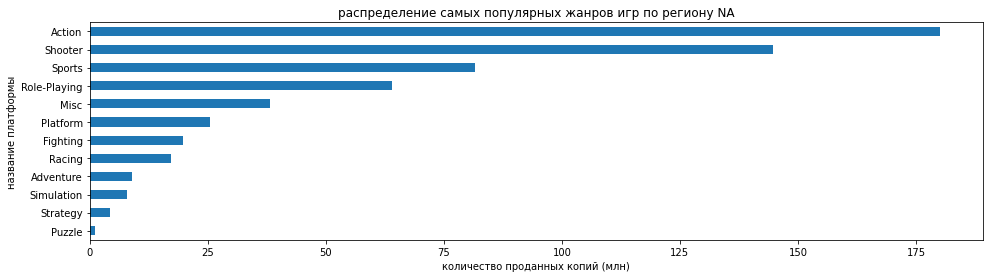

In [69]:
data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (16, 4)) 

plt.title('распределение самых популярных жанров игр по региону NA')
plt.xlabel('количество проданных копий (млн)')
plt.ylabel('название платформы');

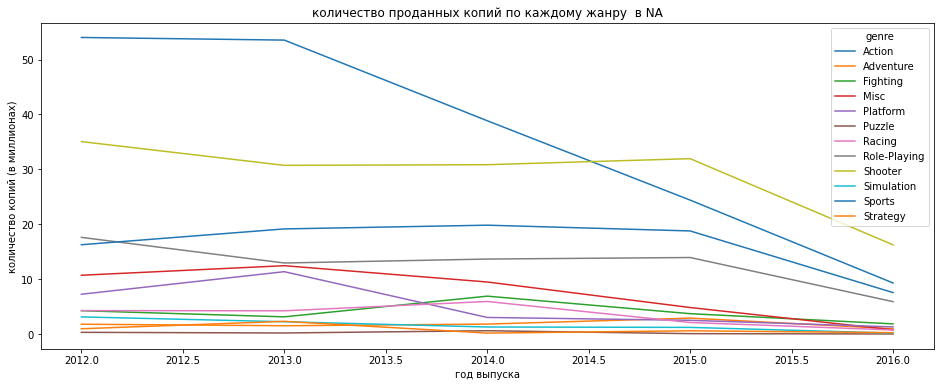

In [70]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'genre',
                                                            values = 'na_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 6))
                                   )
plt.title('количество проданных копий по каждому жанру  в NA')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Самые популярные жанры:
- экшен
- шуттеры
- спортивные игры
- рпг
- misc\

По количеству проданных копий за период с 2012 по 2016 самым популярным жанром был action, но с 2014 года лидирующую позицию занимают шуттеры

#### Влияет ли рейтинг ESRB на продажи

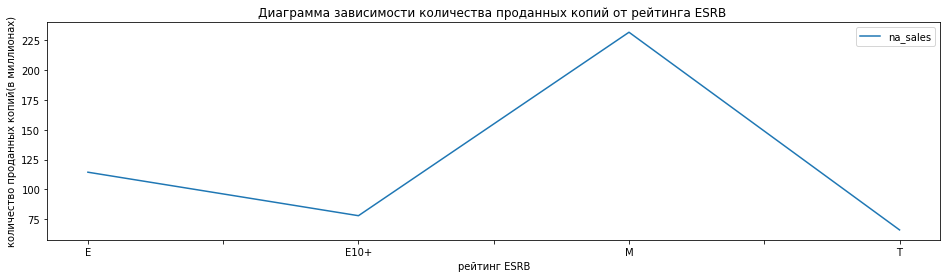

In [71]:
data_actual_NA =(data_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
                  .plot(title = 'Диаграмма зависимости количества проданных копий от рейтингa ESRB ',
                        figsize = (16, 4))
                )
plt.xlabel('рейтинг ESRB')
plt.ylabel('количество проданных копий(в миллионах)');         

Выведем значение рейтинга:
   - E	Подходит для всех возрастных категорий.
   - E 10+	Подходит для лиц старше 10 лет.
   - T	Подходит для лиц старше 13 лет.
   - M	Подходит для лиц старше 17 лет.

Самые большие продажи в категории М - для лиц старше 17 лет

### пользователи в регионе EU

#### Самые популярные платформы (топ-5):

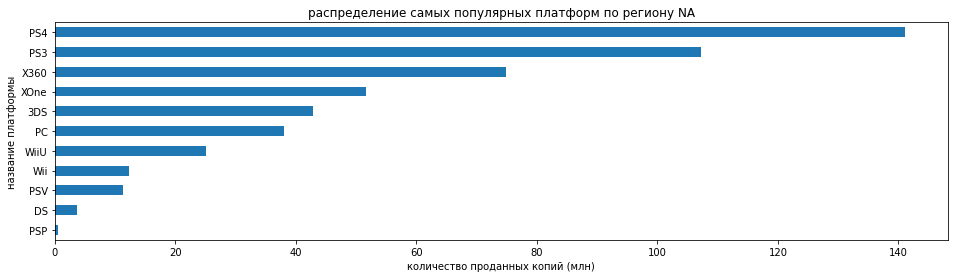

In [72]:
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (16, 4)) 

plt.title('распределение самых популярных платформ по региону NA')
plt.xlabel('количество проданных копий (млн)')
plt.ylabel('название платформы');

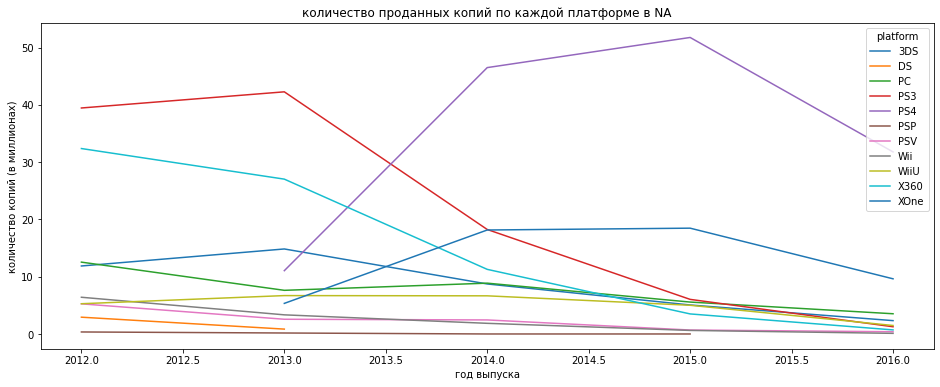

In [73]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'platform',
                                                            values = 'eu_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 6))
                                   )
plt.title('количество проданных копий по каждой платформе в NA')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Популярные платформы:
- PS4
- PS3
- X360
- XOne
- 3DS

Так же, можно отметить явное преимущество платформ ps от остальных 

#### Самые популярные жанры (топ-5):

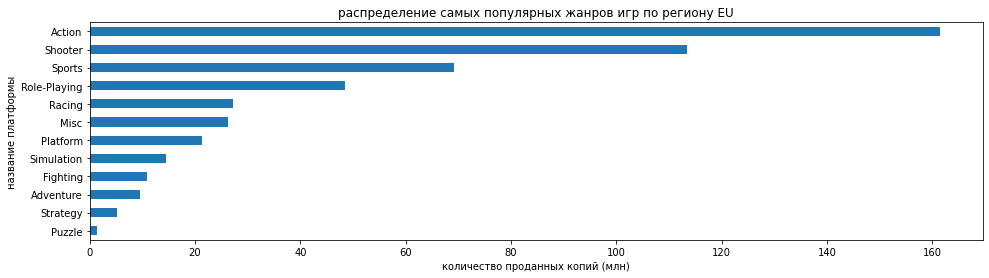

In [74]:
data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (16, 4)) 

plt.title('распределение самых популярных жанров игр по региону EU')
plt.xlabel('количество проданных копий (млн)')
plt.ylabel('название платформы');

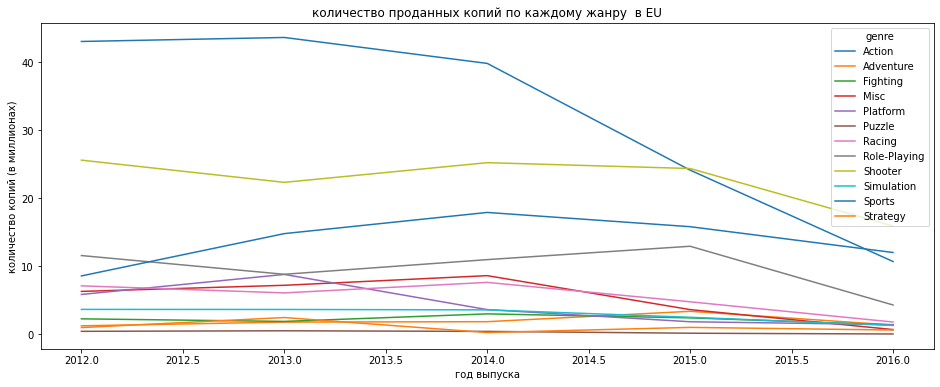

In [75]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'genre',
                                                            values = 'eu_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 6))
                                   )
plt.title('количество проданных копий по каждому жанру  в EU')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Популярные жанры:
- Action
- Shooter	
- Sports
- Role-Playing
- Racing

Можно заметить, что у пользоватетей данного региона за последний год игры жанров шуттер  и спорт  стали популярнее чем экшен, за счет резкого снижения спроса данного жанра после 2014 года

#### Влияет ли рейтинг ESRB на продажи

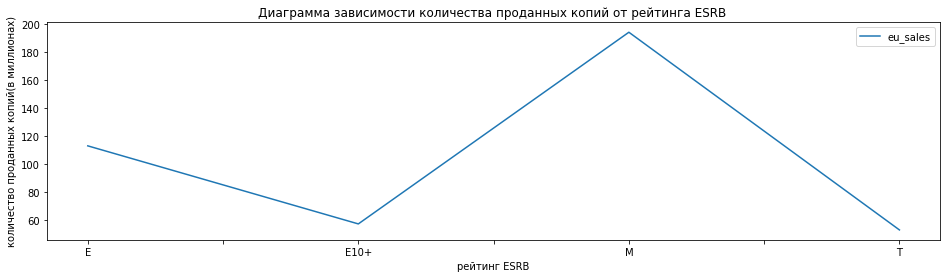

In [76]:
data_actual_NA =(data_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
                  .plot(title = 'Диаграмма зависимости количества проданных копий от рейтингa ESRB ',
                        figsize = (16, 4))
                )
plt.xlabel('рейтинг ESRB')
plt.ylabel('количество проданных копий(в миллионах)');  

Распределение рейтинга одинаково с пользователями региона NA

### пользователи в регионе JP

#### Самые популярные платформы (топ-5):

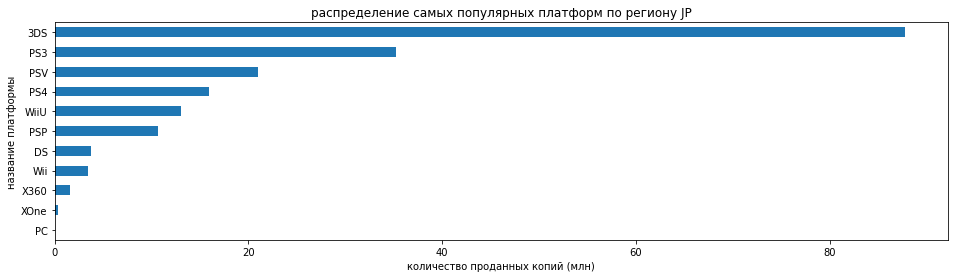

In [77]:
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (16, 4)) 

plt.title('распределение самых популярных платформ по региону JP')
plt.xlabel('количество проданных копий (млн)')
plt.ylabel('название платформы');

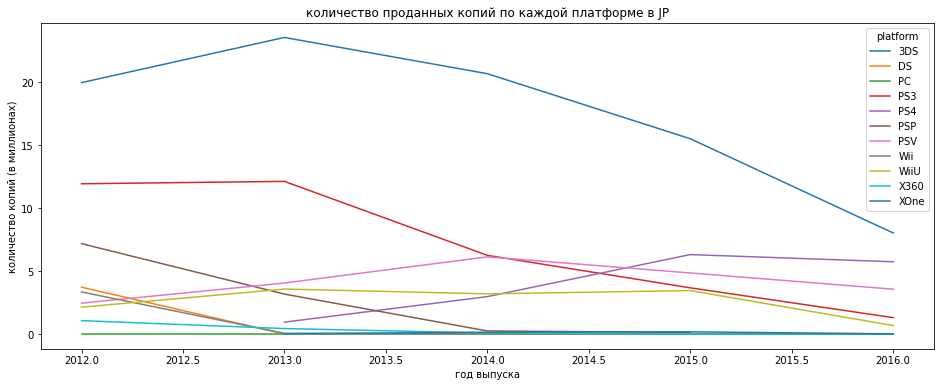

In [78]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'platform',
                                                            values = 'jp_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 6))
                                   )
plt.title('количество проданных копий по каждой платформе в JP')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Популярные платформы:
- 3DS
- PS3
- PSV
- PS4
- WiiU

Из актуальный платформ, которые по-немному набирают (или держат популярность) можно отметить PS4 и PSV

    

#### Самые популярные жанры (топ-5):

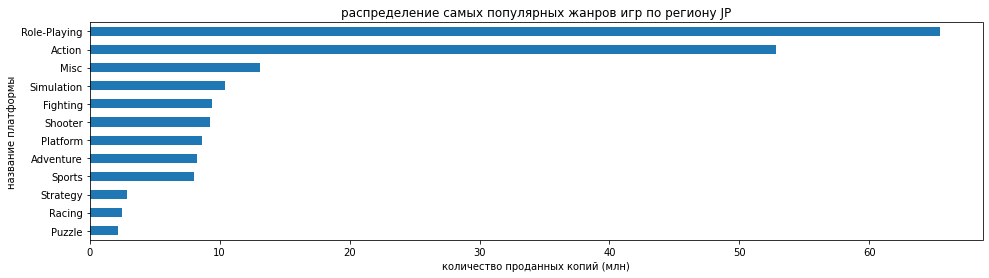

In [79]:
data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (16, 4)) 

plt.title('распределение самых популярных жанров игр по региону JP')
plt.xlabel('количество проданных копий (млн)')
plt.ylabel('название платформы');

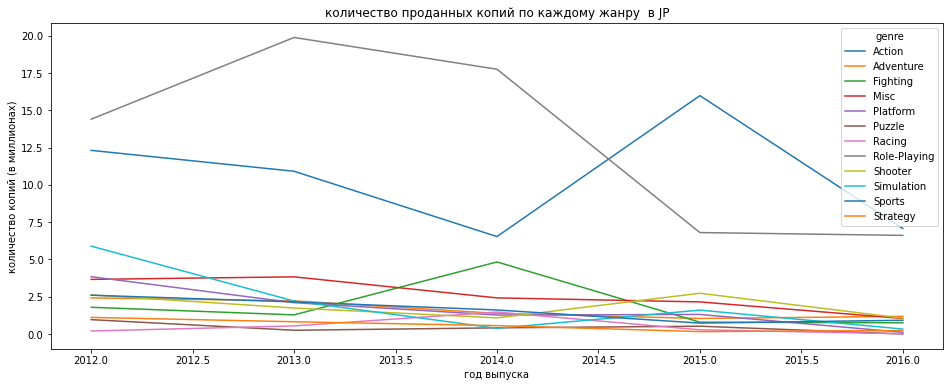

In [80]:
data_actual_table = (data_actual.pivot_table(index = 'year_of_release',
                                                            columns = 'genre',
                                                            values = 'jp_sales', 
                                                            aggfunc ='sum')
                                    .plot( figsize = (16, 6))
                                   )
plt.title('количество проданных копий по каждому жанру  в JP')
plt.xlabel('год выпуска')
plt.ylabel('количество копий (в миллионах)');

Самые популярные жанры:
- Role-Playing
- Action
- Misk
- Simulation
- Fightind
- Shooter

Можно так же отметить, что на протяжении длительного времени самым популярным жанром был Role-Playing, однако, за последний год ситуация изменилась, и на конец 2016 года лидирует жанр Action

#### Влияет ли рейтинг ESRB на продажи

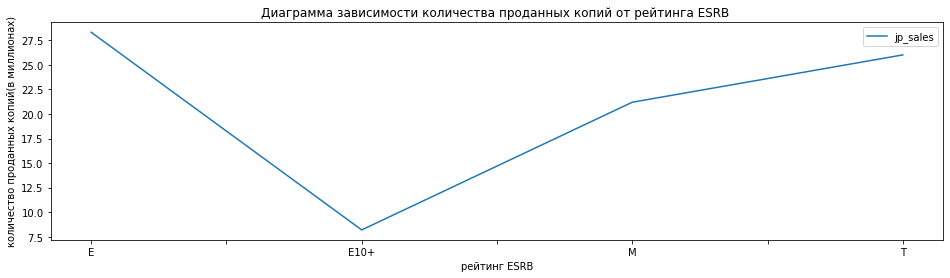

In [81]:
data_actual_NA =(data_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
                  .plot(title = 'Диаграмма зависимости количества проданных копий от рейтингa ESRB ',
                        figsize = (16, 4))
                )
plt.xlabel('рейтинг ESRB')
plt.ylabel('количество проданных копий(в миллионах)');  

Самые низкие продажи в рейтинге Е10+, в остальном- все примерно на одном уровне.

### сравнительные выводы о пользователях каждого из регионов

После исследования данных, можно сделать выводы о том что:
   - пользователи в NA больше предпочитают платформу Xbox (производство- США)
   - в Европе(EU) и Японии (JP) более консоли производства Sony (PS3, PS4). В Японии, так же огромную популярность имеют портативные консоли (3DS), но в последние годы их популярность заметно снижается
   - у пользователей в Северной Америке и Европе примерно одинаковые вкусы в играх. Первые 4 жанра из топ-5 имеют одинаковые позиции у обоих. 
   - У пользователей из Японии вкусы на игры имеют огромное отличие от остальных. Например, экшен, который в других контенентах является беспорным лидером по продажам, здесь только начинает набирать свою популярность
   - Рейтинг ESRB существенно влияет на продажи в Америке и Европе (самые продаваемые игры имеют рейтинг М). Однако, данная система оценки не распространена в японии, поэтому вывод о зависимости рейтинга к родажам говорить очень сложно (вывод о непопулярности можно сделать исходя из данных оси у в графике. Значения там существенно ниже, чем в других регионах)

##  Проверим гипотезы 
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  - Зададим самостоятельно пороговое значение  для alpha.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Поставим 2 Гипотезы:\
Основная - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
Альтернативная - Средние пользовательские рейтинги платформ Xbox One и PC разные (неважно в чью сторону)

In [82]:
data_actual_XOne = data_actual.loc[data_actual['platform'] == 'XOne',['user_score']].dropna()
data_actual_PC = data_actual.loc[data_actual['platform'] == 'PC', ['user_score']].dropna()

In [83]:
alpha = 0.01 #уровень статист. значимости 

results = st.ttest_ind(data_actual_XOne,
                       data_actual_PC,
                       equal_var = False,
                       alternative ='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: [0.57659675]
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value оказалось слишном низким, чтобы отвергнуть нулевую гипотезу. Значит, мы можем сказать, что пользовательские рейтинги платформ Xbox One и PC примерно одинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Основная гипотеза - Средние пользовательские рейтинги жанров Action  и Sports равны 

Альтернаятивная - Средние пользовательские рейтинги жанров Action  и Sports разные

In [84]:
data_actual_Action = data_actual.loc[data_actual['genre'] == 'Action',['user_score']].dropna()
data_actual_Sports = data_actual.loc[data_actual['genre'] == 'Sports', ['user_score']].dropna()

In [85]:
alpha = 0.05 #уровень статист. значимости 

results = st.ttest_ind(data_actual_Action,
                       data_actual_Sports,
                       equal_var = False,
                       alternative ='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: [3.94903139e-20]
Отвергаем нулевую гипотезу


Нулевая гипотезе отвергнута, а, значит, что средние пользовательские рейтинги жанров Action и Sports действительно разные

##  Напишем общий вывод

#### В ходе исследовательской работы было выявлено:
 - игры массово стали производить с 1993. Пик количества производительности игр в год можно считать период с 2005 по 2011 
 - после 2012 года компании взяли вектор на более тщательную проработку каждой игры. Об этом говорит резкий упадок по количеству игр в эти периоды, и увеличение средней оценки критиков
 - средняя продолжительность жизни одной платформы 8-10 лет. Самыми популярными за весь временной промежуток можно считать платформу ps2, средом по популярности идут x360, ps3 и wii. Однако, на конец 2016 года их популярность стала падать, а на замену пришли новые поколения платформ
 - новое поколение популярных платформ: PS4 и XOne. Они были созданы в 2013 и являются потенциально самыми  прибыльными из числа других
 - для дальнейшего анализа и прогнозов был выбран временной промежуток с 2012 года. Именно тогда компанни перестали массово выпускать игры и сменили вектор на более качественный продукт.
 - игры, выпускаемые на компьютеры имеет более низкую стоимость чем такие же игры, которые выпускаются на консоли (об этом гововят медианы продаж по каждой платформе)
- корреляция между оценкой критиков  и количеством проданных копий  небольшая  - то есть, зависимость между показателями есть, но одно не критично  влияет на другое (процент корреляции примерно 20 - 40%). Оценка пользователей, наоборот, не имеет влияния на общие продажи игры.
- Самые популярные жанры по количеству игр - action и shooter. Самые прибыльные - shooter, sports и  platform

#### Выводы о пользователях по каждому региону:
  - пользователи в NA больше предпочитают платформу Xbox (производство- США)
  - в Европе(EU) и Японии (JP) более консоли производства Sony (PS3, PS4). В Японии, так же огромную популярность имеют портативные консоли (3DS), но в последние годы их популярность заметно снижается
   - у пользователей в Северной Америке и Европе примерно одинаковые вкусы в играх. Первые 4 жанра из топ-5 имеют одинаковые позиции у обоих. 
   - У пользователей из Японии вкусы на игры имеют огромное отличие от остальных. Например, экшен, который в других контенентах является беспорным лидером по продажам, здесь только начинает набирать свою популярность
   - Рейтинг ESRB существенно влияет на продажи в Америке и Европе (самые продаваемые игры имеют рейтинг М). Однако, данная система оценки не распространена в японии, поэтому вывод о зависимости рейтинга к родажам говорить очень сложно (вывод о непопулярности можно сделать исходя из данных оси у в графике. Значения там существенно ниже, чем в других регионах)

#### Проверка гипотез:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - данная гипотеза подтвергилась. Оценка пользователей у каждой платформа действительно примерно равна 
 - Средние пользовательские рейтинги жанров Action  и Sports  разные - данная гипотеза была так же подверждена. 